# 0. Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
import warnings
import plotly.express as px
import plotly.graph_objects as go

sns.set_theme(style="darkgrid")
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/FT1000_v1.csv')
df.head()

,Rank,Name,Ranked2021,Ranked2020,Country,Sector,CAGR,Revenue2020,Revenue2017,Employees2020,Employees2017,FoundingYear,Country1,Sector1
0,1,Swappie,No,No,Finland,Technology,477.43,97611814,507000,218,1,2016,Finland,Technology
1,2,Kilo Health,No,No,Lithuania,Health,450.05,57318766,344428,177,10,2013,Lithuania,Health
2,3,OCI,No,No,UK,Financial Services,409.59,568322073,4325512,32,4,2012,UK,Financial Services
3,4,OnlyFans,No,No,UK,Technology,393.63,316732986,2652185,800,4,2016,UK,Technology
4,5,Enpal,No,No,Germany,Energy,386.88,56109613,486165,365,9,2017,Germany,Energy


## 4.3. Câu hỏi 3
**Câu hỏi**: Lĩnh vực nào có nhiều công ty phát triển nhanh bền vững?

**Ý nghĩa**: Bảng xếp hạng FT1000 năm 2022 chỉ cho thấy các công ty phát triển nhanh trong giai đoạn 2017 - 2020. Trong số các công ty này, có những công ty mới được xếp hạng năm nay (không có trong bảng xếp hạng 2 năm trước), những công ty xuất hiện chỉ xong 1 bảng xếp hạng (năm 2020 hoặc 2021) và những công ty xuất hiện trong cả hai bảng xếp hạng năm 2020 và 2021. Những công ty xuất hiện trong bảng xếp hạng 3 năm liên tiếp được xem là công ty phát triển bền vững, có thể tiếp tục phát triển trong tương lai. Biết được lĩnh vực của các công ty này, các nhà đầu tư có thể lựa chọn công ty phù hợp để đầu tư. Ở đây ta chỉ xét các lĩnh vực có từ 5 công ty trở lên phát triển nhanh bền vững

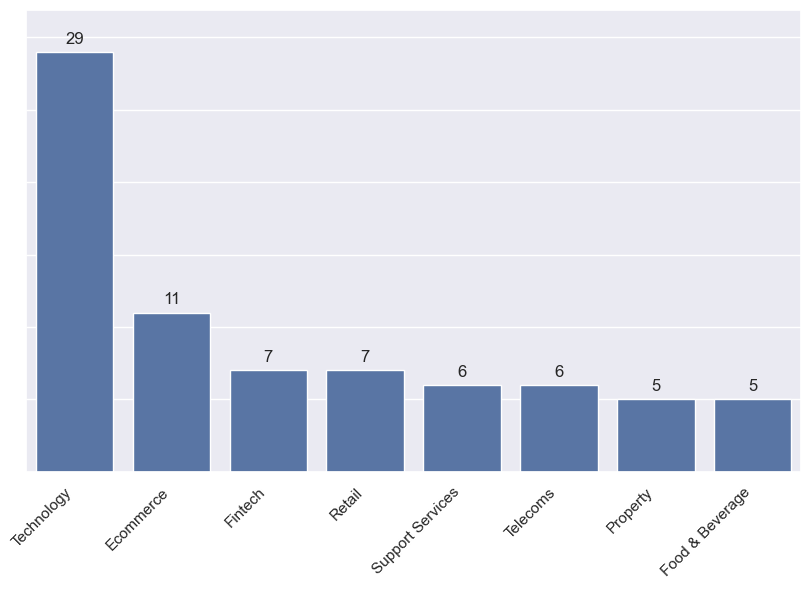

In [3]:
data = df[(df['Ranked2020'] == 'Yes') & (df['Ranked2021'] == 'Yes')]['Sector'].value_counts().reset_index()
data = data[data['Sector'] >= 5] 

plt.figure(figsize=(10, 6))
ax = sns.barplot(x = 'index', y = 'Sector', data = data, color = 'C0')

ax.set_ylim(0, data['Sector'].max() * 1.1)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels('')

dis_from_top = 0.02 * data['Sector'].max()

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + dis_from_top), ha = 'center')

ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right');